In [1]:
# My laptop issues due to multiple envs - will fix later, this is tmp fix - sorry !!
import sys
import os

virtulenvPath = os.path.join(os.getcwd(), 'myenv')
pyVersion = 'python'+ '.'.join(sys.version.split('.')[:2])

virtualEnvSitePackages = os.path.join(virtulenvPath, 'lib', pyVersion, 'site-packages')


if virtualEnvSitePackages not in sys.path:
    sys.path.append(virtualEnvSitePackages)
    print(sys.path)
    print("Current venv added to path")
else:
    print("Kernel and path are good to go !!")

['/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/usr/local/lib/python3.12/dist-packages', '/usr/lib/python3/dist-packages', '/home/takshil/Takshil.Khorasia.BDAT1004PS3/myenv/lib/python3.12/site-packages']
Current venv added to path


# Q1) Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

## Dataset: Occupations

### Steps:
1. Import the necessary libraries.
2. Dataset: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user`
3. Assign the dataset to a variable called `users`.
4. Discover the mean age per occupation.
5. Discover the Male ratio per occupation and sort it from the most to the least.
6. For each occupation, calculate the minimum and maximum ages.
7. For each combination of occupation and sex, calculate the mean age.
8. For each occupation, present the percentage of women and men.

In [11]:
# Step 1: Import the necessary libraries
import pandas as pd

# Step 2: Dataset URL
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

# Step 3: Read the dataset and assign it to a variable called users
users = pd.read_csv(url, sep="|")

# Display the first few rows of the dataset
print("Dataset Preview:")
print(users.head())

# Step 4: Discover the mean age per occupation
meanAgePerOccupation = users.groupby('occupation')['age'].mean()
print("\n\nStep 4: Mean Age Per Occupation:")
print(meanAgePerOccupation)

# Step 5: Discover the Male ratio per occupation and sort it from the most to the least
maleRatioPerOccupation = (
    users.groupby('occupation')['gender']
    .apply(lambda x: (x == 'M').sum() / x.count())
    .sort_values(ascending=False)
)
print("\n\nStep 5: Male Ratio Per Occupation:")
print(maleRatioPerOccupation)

# Step 6: For each occupation, calculate the minimum and maximum ages
minMaxAgePerOccupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print("\n\nStep 6: Minimum and Maximum Age Per Occupation:")
print(minMaxAgePerOccupation)

# Step 7: For each combination of occupation and sex, calculate the mean age
meanAgePerOccupationGender = users.groupby(['occupation', 'gender'])['age'].mean()
print("\n\nStep 7: Mean Age Per Occupation and Gender:")
print(meanAgePerOccupationGender)

# Step 8: For each occupation, present the percentage of women and men
genderPercentagePerOccupation = (
    users.groupby('occupation')['gender']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    * 100
)
print("\n\nStep 8: Percentage of Women and Men Per Occupation:")
print(genderPercentagePerOccupation)


Dataset Preview:
   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213


Step 4: Mean Age Per Occupation:
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


Step 5: Male Ratio Per Occupation:
occupation
doctor           1.000000
engine

# Q2) Euro Teams

## Dataset: Euro 2012 Stats

### Steps:
1. Import the necessary libraries.
2. Import the dataset from this address:  
   `https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv`
3. Assign it to a variable called `euro12`.
4. Select only the `Goal` column.
5. How many teams participated in the Euro 2012?
6. What is the number of columns in the dataset?
7. View only the columns `Team`, `Yellow Cards`, and `Red Cards` and assign them to a DataFrame called `discipline`.
8. Sort the teams by `Red Cards`, then by `Yellow Cards`.
9. Calculate the mean `Yellow Cards` given per team.
10. Filter teams that scored more than 6 goals.
11. Select the teams that start with `G`.
12. Select the first 7 columns.
13. Select all columns except the last 3.
14. Present only the `Shooting Accuracy` from `England`, `Italy`, and `Russia`.


In [13]:
# Step 1: Import the necessary libraries
import pandas as pd

# Step 2: Dataset URL
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

# Step 3: Import the dataset and assign it to a variable called euro12
euro12 = pd.read_csv(url)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(euro12.head())

# Step 4: Select only the Goal column
goalColumn = euro12['Goals']
print("\n\nStep 4: Goals Column:")
print(goalColumn)

# Step 5: How many teams participated in the Euro 2012?
teamCount = euro12['Team'].nunique()
print("\n\nStep 5: Number of Teams Participated:")
print(teamCount)

# Step 6: What is the number of columns in the dataset?
columnCount = euro12.shape[1]
print("\n\nStep 6: Number of Columns:")
print(columnCount)

# Step 7: View only the columns Team, Yellow Cards, and Red Cards and assign them to a DataFrame called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print("\n\nStep 7: Discipline DataFrame:")
print(discipline)

# Step 8: Sort the teams by Red Cards, then by Yellow Cards
sortedDiscipline = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[True, True])
print("\n\nStep 8: Sorted by Red Cards, then Yellow Cards:")
print(sortedDiscipline)

# Step 9: Calculate the mean Yellow Cards given per team
meanYellowCards = euro12['Yellow Cards'].mean()
print("\n\nStep 9: Mean Yellow Cards per Team:")
print(meanYellowCards)

# Step 10: Filter teams that scored more than 6 goals
teamsMoreThan6Goals = euro12[euro12['Goals'] > 6]
print("\n\nStep 10: Teams That Scored More Than 6 Goals:")
print(teamsMoreThan6Goals)

# Step 11: Select the teams that start with G
teamsStartingWithG = euro12[euro12['Team'].str.startswith('G')]
print("\n\nStep 11: Teams Starting With G:")
print(teamsStartingWithG)

# Step 12: Select the first 7 columns
first7Columns = euro12.iloc[:, :7]
print("\n\nStep 12: First 7 Columns:")
print(first7Columns)

# Step 13: Select all columns except the last 3
allExceptLast3Columns = euro12.iloc[:, :-3]
print("\n\nStep 13: All Columns Except the Last 3:")
print(allExceptLast3Columns)

# Step 14: Present only the Shooting Accuracy from England, Italy, and Russia
shootingAccuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
print("\n\nStep 14: Shooting Accuracy for England, Italy, and Russia:")
print(shootingAccuracy)


Dataset Preview:
             Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
0         Croatia      4               13                12             51.9%   
1  Czech Republic      4               13                18             41.9%   
2         Denmark      4               10                10             50.0%   
3         England      5               11                18             50.0%   
4          France      3               22                24             37.9%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
0            16.0%                          32             0              0   
1            12.9%                          39             0              0   
2            20.0%                          27             1              0   
3            17.2%                          40             0              0   
4             6.5%                          65             1              0   

   Penalties not scor

# Q3) Housing

### Steps:
1. Import the necessary libraries.
2. Create 3 different Series, each of length 100:
   - The first contains random numbers from 1 to 4.
   - The second contains random numbers from 1 to 3.
   - The third contains random numbers from 10,000 to 30,000.
3. Create a DataFrame by joining the Series by column.
4. Change the column names to `bedrs`, `bathrs`, and `priceSqrMeter`.
5. Create a one-column DataFrame with the values of the 3 Series combined and assign it to `bigColumn`.
6. Verify if the new DataFrame only goes up to index 99.
7. Reindex the DataFrame so it goes from 0 to 299.


In [14]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np

# Step 2: Create 3 different Series
series1 = pd.Series(np.random.randint(1, 5, size=100))  # Random numbers from 1 to 4
series2 = pd.Series(np.random.randint(1, 4, size=100))  # Random numbers from 1 to 3
series3 = pd.Series(np.random.randint(10000, 30001, size=100))  # Random numbers from 10,000 to 30,000

# Step 3: Create a DataFrame by joining the Series by column
housingData = pd.concat([series1, series2, series3], axis=1)

# Step 4: Change the name of the columns to bedrs, bathrs, priceSqrMeter
housingData.columns = ['bedrs', 'bathrs', 'priceSqrMeter']

# Display the first few rows of the DataFrame
print("\nStep 4: Housing DataFrame Preview:")
print(housingData.head())

# Step 5: Create a one-column DataFrame with the values of the 3 Series combined
bigColumn = pd.DataFrame(pd.concat([series1, series2, series3], axis=0))

# Rename the column
bigColumn.columns = ['bigColumn']

# Display the first few rows of the one-column DataFrame
print("\n\nStep 5: BigColumn DataFrame Preview:")
print(bigColumn.head(120))

# Step 6: Verify if the DataFrame only goes up to index 99
print("\n\nStep 6: Does BigColumn DataFrame go only up to index 99?")
print(bigColumn.index.max() == 99)  # True if it goes only to index 99

# Step 7: Reindex the DataFrame so it goes from 0 to 299
bigColumn = bigColumn.reset_index(drop=True).reindex(range(300))

# Display the reindexed DataFrame
print("\n\nStep 7: BigColumn DataFrame After Reindexing:")
print(bigColumn.tail(10))  # Show the last 10 rows to verify reindexing
print("bigColumn.index.max(): ", bigColumn.index.max())


Step 4: Housing DataFrame Preview:
   bedrs  bathrs  priceSqrMeter
0      2       3          23418
1      1       3          15535
2      1       3          14130
3      3       1          17037
4      4       3          18370


Step 5: BigColumn DataFrame Preview:
    bigColumn
0           2
1           1
2           1
3           3
4           4
..        ...
15          2
16          2
17          2
18          3
19          3

[120 rows x 1 columns]


Step 6: Does BigColumn DataFrame go only up to index 99?
True


Step 7: BigColumn DataFrame After Reindexing:
     bigColumn
290      12867
291      15581
292      29502
293      20535
294      16640
295      22732
296      21539
297      24524
298      25946
299      21257
bigColumn.index.max():  299


# Q4) Wind Statistics

### Steps:
1. Import the necessary libraries.
2. Import the dataset from the attached file `wind.txt`.
3. Assign it to a variable called `data` and replace the first 3 columns with a proper datetime index.
4. Address the incorrect year `2061` by creating a function to fix it and apply it to the dataset.
5. Set the correct dates as the index and ensure the data type is `datetime64[ns]`.
6. Compute the number of missing values for each location and ensure they are ignored in calculations.
7. Compute the total number of non-missing values.
8. Calculate the mean windspeeds across all locations and times (a single number).
9. Create a DataFrame `loc_stats` with the min, max, mean, and standard deviation of windspeeds at each location.
10. Create a DataFrame `day_stats` with the min, max, mean, and standard deviation of windspeeds across all locations for each day.
11. Find the average windspeed in January for each location (combine data for January 1961 and January 1962).
12. Downsample the record to a yearly frequency for each location.
13. Downsample the record to a monthly frequency for each location.
14. Downsample the record to a weekly frequency for each location.
15. Calculate the min, max, mean, and standard deviation of windspeeds across all locations for the first 52 weeks, assuming the first week starts on January 2, 1961.


In [15]:
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

# Step 2. Import the dataset from the attached file
# Read the dataset using raw string for regex in 'sep'
filePath = "wind.txt"  # Update with the correct path
data = pd.read_csv(filePath, sep=r'\s+', header=1)

# Step 3. Assign it to a variable called data and replace the first 3 columns with a proper datetime index

# Rename columns
data.columns = ['year', 'month', 'day'] + [f'loc{i}' for i in range(1, 13)]

# Combine year, month, day into a datetime column
data['date'] = pd.to_datetime(
    data[['year', 'month', 'day']].astype(int).astype(str).agg('-'.join, axis=1),
    format='%y-%m-%d'
)

# Step 4. Year 2061? Fix the years using a function
# Fix years in the future (e.g., 2061 -> 1961)
def fix_year(df):
    df.index = df.index.map(lambda x: x.replace(year=x.year - 100) if x.year > 2000 else x)
    return df

# Set 'date' as index
data = data.drop(columns=['year', 'month', 'day'])
data = data.set_index('date')
data = fix_year(data)

# Validate the structure
print("\n\nValidate the structure")
print(data.info())
print(data.head())

# Step 5. Ensure the index is datetime64[ns]
print("\n\nStep 5: Ensure the index is datetime64[ns]")
print(data.index.dtype)  # Should output `datetime64[ns]`

# Step 6. Compute missing values for each location
print("\n\nStep 6: Compute missing values for each location")
missing_values = data.isnull().sum()
print(missing_values)

# Step 7. Compute the total number of non-missing values
print("\n\nStep 7: Compute the total number of non-missing values")
total_non_missing = data.notnull().sum().sum()
print(total_non_missing)

# Step 8. Calculate the overall mean windspeed
print("\n\nStep 8: Calculate the overall mean windspeed")
overall_mean_windspeed = data.mean().mean()
print(overall_mean_windspeed)

# Step 9. Create loc_stats DataFrame
print("\n\nStep 9: Create loc_stats DataFrame")
loc_stats = data.describe().T[['min', 'max', 'mean', 'std']]
print(loc_stats)

# Step 10. Create day_stats DataFrame
print("\n\nStep 10: Create day_stats DataFrame")
day_stats = data.aggregate(['min', 'max', 'mean', 'std'], axis=1)
print(day_stats.head())

# Step 11: Find the average windspeed in January for each location
print("\n\nStep 11: Find the average windspeed in January for each location")
january_avg = data[data.index.month == 1].mean()
print("January average windspeeds:\n", january_avg)

# Step 12: Downsample to yearly frequency for each location
print("\n\nStep 12: Downsample to yearly frequency for each location")
yearly_data = data.resample('YE').mean()  # 'YE' is year-end frequency
print("Yearly data (first 5 rows):\n", yearly_data.head())

# Step 13: Downsample to monthly frequency for each location
print("\n\nStep 13: Downsample to monthly frequency for each location")
monthly_data = data.resample('MS').mean()  # 'MS' is start of the month
print("Monthly data (first 5 rows):\n", monthly_data.head())

# Step 14: Downsample to weekly frequency for each location
print("\n\nStep 14: Downsample to weekly frequency for each location")
weekly_data = data.resample('W').mean()
print("Weekly data (first 5 rows):\n", weekly_data.head())

# Step 15: Calculate min, max, mean, and std for the first 52 weeks
print("\n\nStep 15: Calculate min, max, mean, and std for the first 52 weeks")
weekly_stats = weekly_data.iloc[:52].aggregate(['min', 'max', 'mean', 'std'], axis=1)
print("Weekly statistics for the first 52 weeks:\n", weekly_stats)




Validate the structure
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6573 entries, 1961-01-02 to 1978-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   loc1    6567 non-null   float64
 1   loc2    6570 non-null   float64
 2   loc3    6571 non-null   float64
 3   loc4    6568 non-null   float64
 4   loc5    6572 non-null   float64
 5   loc6    6573 non-null   float64
 6   loc7    6570 non-null   float64
 7   loc8    6571 non-null   float64
 8   loc9    6570 non-null   float64
 9   loc10   6572 non-null   float64
 10  loc11   6573 non-null   float64
 11  loc12   6569 non-null   float64
dtypes: float64(12)
memory usage: 667.6 KB
None
             loc1   loc2   loc3   loc4   loc5  loc6   loc7   loc8   loc9  \
date                                                                       
1961-01-02  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
1961-01-03  18.50  16.88  12.33  10.13  11.17  6.17  11.

### Question 5

**Step 1:** Import the necessary libraries  
**Step 2:** Import the dataset from this URL: [https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv)  
**Step 3:** Assign it to a variable called `chipo`.  
**Step 4:** See the first 10 entries.  
**Step 5:** What is the number of observations in the dataset?  
**Step 6:** What is the number of columns in the dataset?  
**Step 7:** Print the name of all the columns.  
**Step 8:** How is the dataset indexed?  
**Step 9:** Which was the most-ordered item?  
**Step 10:** For the most-ordered item, how many items were ordered?  
**Step 11:** What was the most ordered item in the `choice_description` column?  
**Step 12:** How many items were ordered in total?  
**Step 13:**  
- Turn the `item_price` into a float.  
- Check the `item_price` type.  
- Create a lambda function and change the type of `item_price`.  
- Check the `item_price` type again.  
**Step 14:** How much was the revenue for the period in the dataset?  
**Step 15:** How many orders were made in the period?  
**Step 16:** What is the average revenue amount per order?  
**Step 17:** How many different items are sold?


In [6]:
# Step 1: Import necessary libraries
import pandas as pd

# Step 2: Import the dataset from the given URL
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

# Step 3: Assign it to a variable called chipo
chipo = pd.read_csv(url, sep='\t')

# Step 4: See the first 10 entries
print("\n\nStep 4: First 10 entries:\n", chipo.head(10))

# Step 5: What is the number of observations in the dataset?
print("\n\nStep 5: Number of observations:", chipo.shape[0])

# Step 6: What is the number of columns in the dataset?
print("\n\nStep 6: Number of columns:", chipo.shape[1])

# Step 7: Print the name of all the columns
print("\n\nStep 7: Column names:", chipo.columns.tolist())

# Step 8: How is the dataset indexed?
print("\n\nStep 8: Index information:", chipo.index)

# Step 9: Which was the most-ordered item?
most_ordered_item = chipo.groupby('item_name').quantity.sum().idxmax()
print("\n\nStep 9: Most-ordered item:", most_ordered_item)

# Step 10: For the most-ordered item, how many items were ordered?
most_ordered_qty = chipo.groupby('item_name').quantity.sum().max()
print("\n\nStep 10: Quantity of most-ordered item:", most_ordered_qty)

# Step 11: What was the most ordered item in the choice_description column?
most_ordered_choice = chipo.choice_description.value_counts().idxmax()
print("\n\nStep 11: Most-ordered choice description:", most_ordered_choice)

# Step 12: How many items were ordered in total?
total_items_ordered = chipo.quantity.sum()
print("\n\nStep 12: Total items ordered:", total_items_ordered)

# Step 13: Convert `item_price` to float
# Remove the dollar sign and convert to float
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)

# Check the type of `item_price`
print("\n\nStep 13: Type of item_price after conversion(float):", chipo['item_price'].dtype)

# Step 14: How much was the revenue for the period in the dataset?
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("\n\nStep 14: Total revenue:", revenue)

# Step 15: How many orders were made in the period?
total_orders = chipo['order_id'].nunique()
print("\n\nStep 15: Total orders:", total_orders)

# Step 16: What is the average revenue amount per order?
avg_revenue_per_order = revenue / total_orders
print("\n\nStep 16: Average revenue per order:", avg_revenue_per_order)

# Step 17: How many different items are sold?
unique_items = chipo['item_name'].nunique()
print("\n\nStep 17: Number of different items sold:", unique_items)




Step 4: First 10 entries:
    order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3 

### Question 6
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!

#### Dataset: `us-marriages-divorces-1867-2014.csv`

The dataset contains the following columns:
- **Year**: The year of the data.
- **Marriages**: The total number of marriages in that year.
- **Divorces**: The total number of divorces in that year.
- **Population**: The population of the U.S. in that year.
- **Marriages_per_1000**: The number of marriages per 1000 people.
- **Divorces_per_1000**: The number of divorces per 1000 people.




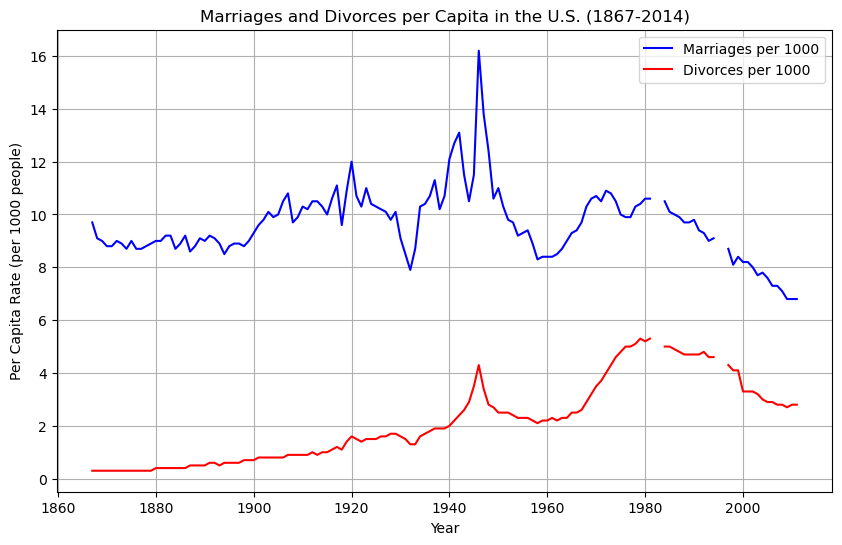

In [12]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the dataset
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Step 3: Create the line plot
plt.figure(figsize=(10, 6))

# Plot Marriages and Divorces per 1000 people
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000', color='blue')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000', color='red')

# Step 4: Label the axes
plt.xlabel('Year')
plt.ylabel('Per Capita Rate (per 1000 people)')

# Step 5: Title and legend
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()

# Step 6: Show the plot
plt.grid(True)
plt.show()


### Question 7

Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.

#### Dataset: `us-marriages-divorces-1867-2014.csv`

Don't forget to label your axes!


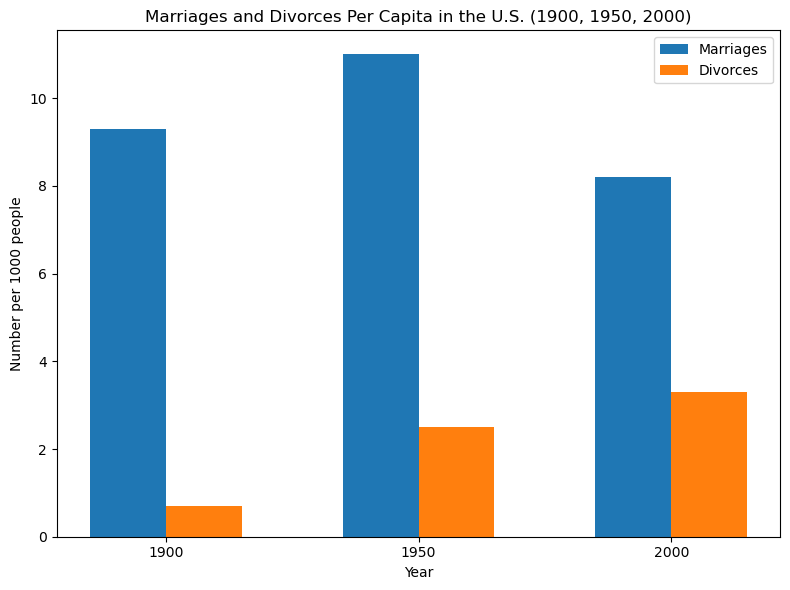

In [14]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the dataset
url = "us-marriages-divorces-1867-2014.csv"
df = pd.read_csv(url)

# Step 3: Filter the data for the years 1900, 1950, and 2000
filteredData = df[df['Year'].isin([1900, 1950, 2000])]

# Step 4: Prepare the data for plotting
years = filteredData['Year']  # Extract the years
marriagesPerCapita = filteredData['Marriages_per_1000']  # Extract marriages per capita
divorcesPerCapita = filteredData['Divorces_per_1000']  # Extract divorces per capita

# Step 5: Create a bar chart
x = range(len(years))  # x-axis positions for the bars

# Step 6: Plot the bars
plt.figure(figsize=(8,6))  # Set the figure size
barWidth = 0.3  # Define the width of the bars

# Step 7: Plot marriages and divorces as bars
plt.bar(x, marriagesPerCapita, width=barWidth, label='Marriages', align='center')
plt.bar([p + barWidth for p in x], divorcesPerCapita, width=barWidth, label='Divorces', align='center')

# Step 8: Labeling the axes and adding a title
plt.xlabel('Year')  # Label the x-axis
plt.ylabel('Number per 1000 people')  # Label the y-axis
plt.title('Marriages and Divorces Per Capita in the U.S. (1900, 1950, 2000)')  # Title of the plot

# Step 9: Adding ticks and a legend
plt.xticks([p + barWidth / 2 for p in x], years)  # Set x-axis ticks
plt.legend()  # Add the legend to the chart

# Step 10: Display the plot
plt.tight_layout()  # Adjust the layout to avoid overlapping
plt.show()  # Show the plot


### Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name.

#### Dataset: `actor_kill_counts.csv`

Don't forget to label your axes!


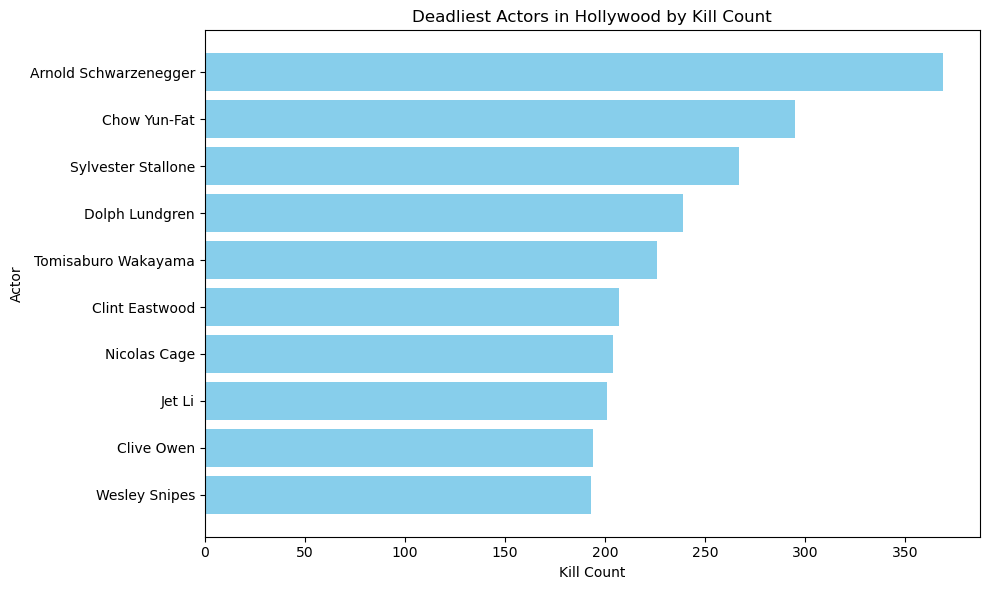

In [10]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the dataset
url = "actor_kill_counts.csv"
df = pd.read_csv(url)

# Step 3: Sort the dataset by kill count
df_sorted = df.sort_values('Count', ascending=True)

# Step 4: Create a horizontal bar chart
plt.figure(figsize=(10, 6))  # Set figure size
plt.barh(df_sorted['Actor'], df_sorted['Count'], color='skyblue')  # Horizontal bars

# Step 5: Labeling the axes and adding a title
plt.xlabel('Kill Count')  # Label the x-axis
plt.ylabel('Actor')  # Label the y-axis
plt.title('Deadliest Actors in Hollywood by Kill Count')  # Title of the plot

# Step 6: Display the plot
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()  # Show the plot


### Question 9

Create a pie chart showing the fraction of all Roman Emperors that were assassinated.

Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

#### Dataset: `roman-emperor-reigns.csv`


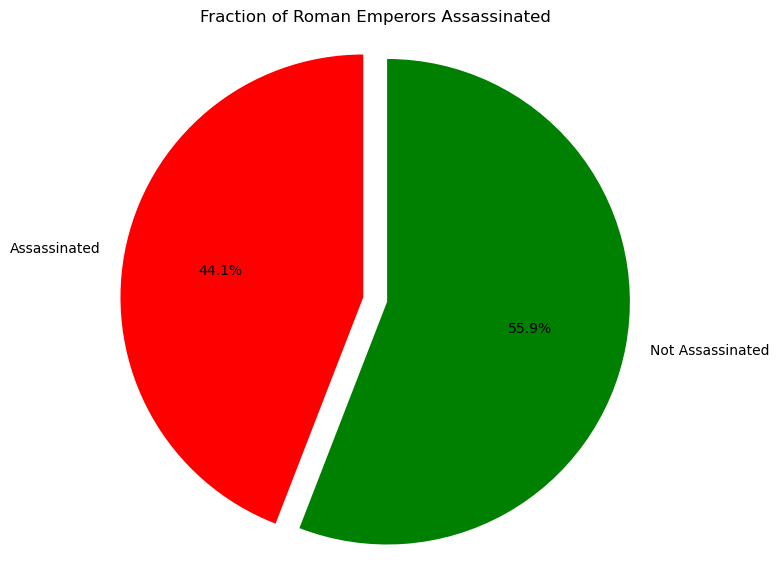

In [16]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the dataset
url = "roman-emperor-reigns.csv"
df = pd.read_csv(url)

# Step 3: Count the number of emperors who were assassinated and not assassinated
assassinated = df['Cause_of_Death'].str.contains('assassinated', case=False, na=False).sum()
not_assassinated = len(df) - assassinated

# Step 4: Prepare data for the pie chart
labels = ['Assassinated', 'Not Assassinated']
sizes = [assassinated, not_assassinated]
colors = ['red', 'green']  # Choose colors for the slices
explode = (0.1, 0)  # Highlight the 'Assassinated' slice

# Step 5: Create the pie chart
plt.figure(figsize=(7, 7))  # Set the figure size to make it a circle
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)

# Step 6: Equal aspect ratio ensures that the pie chart is a circle
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle

# Step 7: Add a title
plt.title('Fraction of Roman Emperors Assassinated')

# Step 8: Display the plot
plt.show()


### Question 10

Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.

Don't forget to label your axes!

Color each dot according to its year.

#### Dataset: `arcade-revenue-vs-cs-doctorates.csv`


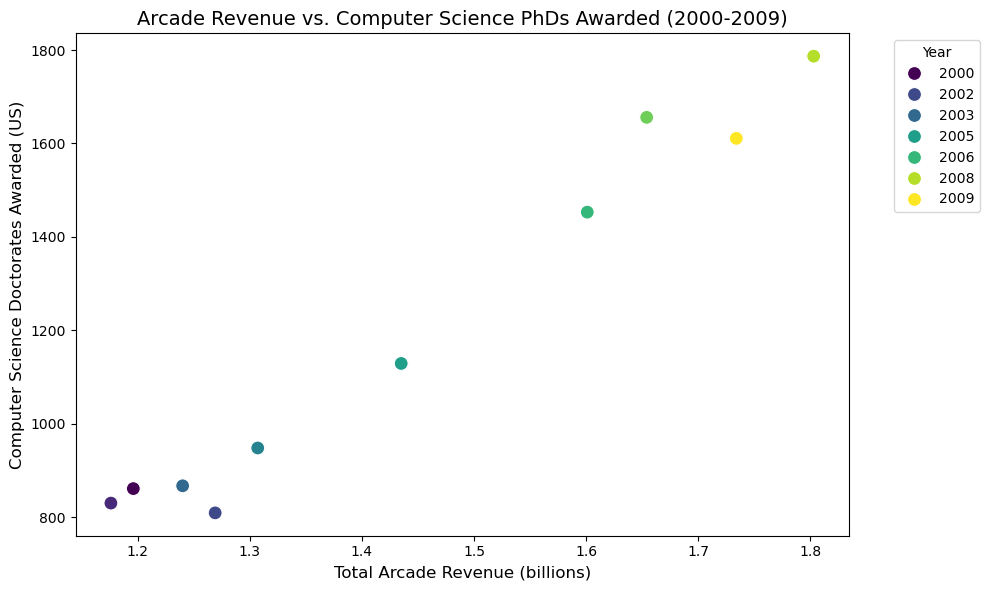

In [19]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
url = "arcade-revenue-vs-cs-doctorates.csv"
df = pd.read_csv(url)

# Step 3: Create a scatter plot
plt.figure(figsize=(10, 6))  # Set figure size
sns.scatterplot(data=df, x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', 
                hue='Year', palette='viridis', s=100)

# Step 4: Label the axes
plt.xlabel('Total Arcade Revenue (billions)', fontsize=12)
plt.ylabel('Computer Science Doctorates Awarded (US)', fontsize=12)

# Step 5: Add a title
plt.title('Arcade Revenue vs. Computer Science PhDs Awarded (2000-2009)', fontsize=14)

# Step 6: Show the plot
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside of the plot
plt.tight_layout()  # Adjust layout to avoid cutting off labels
plt.show()
